In [99]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras import regularizers
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
import datetime, time, os
from tensorflow.keras.layers.experimental import preprocessing
    
print('Using TensorFlow version: %s' % tf.__version__)
np.set_printoptions(precision=3, suppress=True)

import datetime, time, os
from datetime import datetime

from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import StratifiedKFold, KFold

#!pip install -q git+https://github.com/tensorflow/docs # install first time

RSEED = 42

Using TensorFlow version: 2.8.0


In [100]:
# With this command you can clear any logs from previous runs
# If you want to compare different runs you can skip this cell 
!rm -rf my_logs/

## Loading the processed dataframe (sugarbeet and field weatherstation data)


In [101]:
df = pd.read_pickle('/Users/isabellecarinaflaig/neuefische/capstone_project/data_strube/pickles/df_openweather_sugar_coded.pkl')
df

,station_location,dew_point_monthly_10,dew_point_monthly_4,dew_point_monthly_5,dew_point_monthly_6,dew_point_monthly_7,dew_point_monthly_8,dew_point_monthly_9,humidity_monthly_10,humidity_monthly_4,...,ms_comp,obj,otype_comp,sc_nir,seednames_coded,seriesid,totaln_nir,x,y,pollinator
0,Anklam,7.808498,3.438329,7.722774,12.134519,13.884761,13.989472,11.191018,86.308580,74.085577,...,2.0,10.0,1.0,17.1952,108.0,1503.0,0.1521,96.0,13.0,6.0
1,Anklam,7.808498,3.438329,7.722774,12.134519,13.884761,13.989472,11.191018,86.308580,74.085577,...,2.0,14.0,1.0,17.6798,1191.0,1503.0,0.1631,96.0,14.0,16.0
2,Anklam,7.808498,3.438329,7.722774,12.134519,13.884761,13.989472,11.191018,86.308580,74.085577,...,2.0,13.0,1.0,17.3721,103.0,1503.0,0.1553,96.0,15.0,10.0
3,Anklam,7.808498,3.438329,7.722774,12.134519,13.884761,13.989472,11.191018,86.308580,74.085577,...,2.0,9.0,1.0,16.9056,107.0,1503.0,0.1477,96.0,16.0,6.0
4,Anklam,7.808498,3.438329,7.722774,12.134519,13.884761,13.989472,11.191018,86.308580,74.085577,...,2.0,17.0,1.0,17.1998,1194.0,1503.0,0.1542,97.0,13.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14423,Vierhoefen,4.820548,4.072783,8.625505,12.169876,13.248842,13.003779,9.599316,76.704861,67.978205,...,1.0,50.0,3.0,14.5338,628.0,1516.0,0.1641,83.0,8.0,102.0
14424,Vierhoefen,4.820548,4.072783,8.625505,12.169876,13.248842,13.003779,9.599316,76.704861,67.978205,...,7.0,4.0,8.0,13.6961,1205.0,1516.0,0.1639,83.0,9.0,113.0
14425,Vierhoefen,4.820548,4.072783,8.625505,12.169876,13.248842,13.003779,9.599316,76.704861,67.978205,...,1.0,33.0,3.0,12.9078,466.0,1516.0,0.1445,83.0,10.0,80.0
14426,Vierhoefen,4.820548,4.072783,8.625505,12.169876,13.248842,13.003779,9.599316,76.704861,67.978205,...,1.0,51.0,3.0,13.4423,629.0,1516.0,0.1346,83.0,11.0,102.0


In [102]:
# convert to string for categorizing
df['seednames_coded'] = df['seednames_coded'].astype(str)
df['pollinator'] = df['pollinator'].astype(str)
df['ms_comp'] = df['ms_comp'].astype(str)
df['otype_comp'] = df['otype_comp'].astype(str)

In [103]:
df.shape

(14427, 74)

In [104]:
# dropping columns 
df.drop(['betaine_nir', 
         'cry_nir', 
         'dm_nir', 
         'invert_nir', 
         'mark_nir', 
         #'sc_nir',
         'csy_nir', 
         'totaln_nir', 
         'obj',  
         'seriesid', 
         'x', 
         'y', 
         'ms_comp',
         'otype_comp', 
         #'pollinator',
         #'seednames_coded',
         'region',
         'station_location'
         ], axis=1, inplace=True)
df.columns


Index(['dew_point_monthly_10', 'dew_point_monthly_4', 'dew_point_monthly_5',
       'dew_point_monthly_6', 'dew_point_monthly_7', 'dew_point_monthly_8',
       'dew_point_monthly_9', 'humidity_monthly_10', 'humidity_monthly_4',
       'humidity_monthly_5', 'humidity_monthly_6', 'humidity_monthly_7',
       'humidity_monthly_8', 'humidity_monthly_9', 'pressure_monthly_10',
       'pressure_monthly_4', 'pressure_monthly_5', 'pressure_monthly_6',
       'pressure_monthly_7', 'pressure_monthly_8', 'pressure_monthly_9',
       'temp_max_monthly_10', 'temp_max_monthly_4', 'temp_max_monthly_5',
       'temp_max_monthly_6', 'temp_max_monthly_7', 'temp_max_monthly_8',
       'temp_max_monthly_9', 'temp_min_monthly_10', 'temp_min_monthly_4',
       'temp_min_monthly_5', 'temp_min_monthly_6', 'temp_min_monthly_7',
       'temp_min_monthly_8', 'temp_min_monthly_9', 'temp_monthly_10',
       'temp_monthly_4', 'temp_monthly_5', 'temp_monthly_6', 'temp_monthly_7',
       'temp_monthly_8', 'temp_month

In [105]:
df.shape

(14427, 59)

In [106]:
# reset index after drpping columns
df = df.reset_index(drop=True)

#### Creating the pipeline

In [107]:
# creating list for categorical predictors/features 
cat_features = list(df.columns[df.dtypes==object])
cat_features

['seednames_coded', 'pollinator']

In [108]:
# creating list for numerical predictors/features
# since 'sc_nir' is our target variable we will exclude this feature from the list of numerical predictors 
# latitude and longitude are also excluded to avoid location influence on prediction
num_features = [
 'dew_point_monthly_10', 'dew_point_monthly_4', 'dew_point_monthly_5',
       'dew_point_monthly_6', 'dew_point_monthly_7', 'dew_point_monthly_8',
       'dew_point_monthly_9', 'humidity_monthly_10', 'humidity_monthly_4',
       'humidity_monthly_5', 'humidity_monthly_6', 'humidity_monthly_7',
       'humidity_monthly_8', 'humidity_monthly_9', 'pressure_monthly_10',
       'pressure_monthly_4', 'pressure_monthly_5', 'pressure_monthly_6',
       'pressure_monthly_7', 'pressure_monthly_8', 'pressure_monthly_9',
       'temp_max_monthly_10', 'temp_max_monthly_4', 'temp_max_monthly_5',
       'temp_max_monthly_6', 'temp_max_monthly_7', 'temp_max_monthly_8',
       'temp_max_monthly_9', 'temp_min_monthly_10', 'temp_min_monthly_4',
       'temp_min_monthly_5', 'temp_min_monthly_6', 'temp_min_monthly_7',
       'temp_min_monthly_8', 'temp_min_monthly_9', 'temp_monthly_10',
       'temp_monthly_4', 'temp_monthly_5', 'temp_monthly_6', 'temp_monthly_7',
       'temp_monthly_8', 'temp_monthly_9', 'wind_deg_monthly_10',
       'wind_deg_monthly_4', 'wind_deg_monthly_5', 'wind_deg_monthly_6',
       'wind_deg_monthly_7', 'wind_deg_monthly_8', 'wind_deg_monthly_9',
       'wind_speed_monthly_10', 'wind_speed_monthly_4', 'wind_speed_monthly_5',
       'wind_speed_monthly_6', 'wind_speed_monthly_7', 'wind_speed_monthly_8',
       'wind_speed_monthly_9'
]
num_features

['dew_point_monthly_10',
 'dew_point_monthly_4',
 'dew_point_monthly_5',
 'dew_point_monthly_6',
 'dew_point_monthly_7',
 'dew_point_monthly_8',
 'dew_point_monthly_9',
 'humidity_monthly_10',
 'humidity_monthly_4',
 'humidity_monthly_5',
 'humidity_monthly_6',
 'humidity_monthly_7',
 'humidity_monthly_8',
 'humidity_monthly_9',
 'pressure_monthly_10',
 'pressure_monthly_4',
 'pressure_monthly_5',
 'pressure_monthly_6',
 'pressure_monthly_7',
 'pressure_monthly_8',
 'pressure_monthly_9',
 'temp_max_monthly_10',
 'temp_max_monthly_4',
 'temp_max_monthly_5',
 'temp_max_monthly_6',
 'temp_max_monthly_7',
 'temp_max_monthly_8',
 'temp_max_monthly_9',
 'temp_min_monthly_10',
 'temp_min_monthly_4',
 'temp_min_monthly_5',
 'temp_min_monthly_6',
 'temp_min_monthly_7',
 'temp_min_monthly_8',
 'temp_min_monthly_9',
 'temp_monthly_10',
 'temp_monthly_4',
 'temp_monthly_5',
 'temp_monthly_6',
 'temp_monthly_7',
 'temp_monthly_8',
 'temp_monthly_9',
 'wind_deg_monthly_10',
 'wind_deg_monthly_4',
 '

In [109]:
# define predictors and target variable
X = df.drop('sc_nir', axis=1)
y = df['sc_nir']
print(f"We have {X.shape[0]} observations in our dataset and {X.shape[1]} features")
print(f"Our target vector has also {y.shape[0]} values")

We have 14427 observations in our dataset and 58 features
Our target vector has also 14427 values


In [110]:
# split into train and test set (train set: 70%, test set: 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED) 

#### Preprocessing Pipeline

In [111]:
# Pipeline for categorical features 
cat_pipeline = Pipeline([
    ('1hot', OneHotEncoder(handle_unknown='ignore'))
])

In [112]:
# pipeline for numerical features
num_pipeline = Pipeline([
    ('scaler', RobustScaler())
])

In [113]:
# complete pipeline for numerical features
# apply transformers to numerical pipeline
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
], sparse_threshold=0)

#### Transform X_train

In [114]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [115]:
X_train_transformed.shape

X_tf_train = tf.convert_to_tensor(X_train_transformed)
y_tf_train = tf.convert_to_tensor(y_train)

X_tf_test = tf.convert_to_tensor(X_test_transformed)
y_tf_test = tf.convert_to_tensor(y_test)


## Training
For training you need a train/val split (hopefully you did a train/test split before (and you should use the same as in your ML project to make results comparable). 

In [116]:
# define dictionary to store results
training_history = {}

# define number of epochs and learning rate decay
N_TRAIN = len(X_train)
N_VAL = 0.2
EPOCHS = 100
BATCH_SIZE = N_TRAIN // 10
STEPS_PER_EPOCH = N_TRAIN // BATCH_SIZE
# lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
#     0.001,
#     decay_steps=STEPS_PER_EPOCH*1000,
#     decay_rate=1,
#     staircase=False)

### Build, compile and fit your model


In [117]:
# define path for new directory 
root_logdir = os.path.join(os.curdir, "my_logs")

# define function for creating a new folder for each run
def get_run_logdir():
    now = datetime.now()
    run_id = now.strftime('%Y-%m-%d %H:%M:%S')
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [118]:
# define path where checkpoints should be stored
checkpoint_path = "training_1/ML_model.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0) # Set verbose != 0 if you want output during training 
# return [list of your callbacks]
def get_callbacks(name):
    return tf.keras.callbacks.TensorBoard(run_logdir+name, histogram_freq=1)

You can implement your callbacks in the `model.fit()` method below.

In [119]:
def model_compile_and_fit(model, name, optimizer=None, max_epochs=EPOCHS):
  
    # model.compile
    model.compile(optimizer = 'adam', loss = 'mae', metrics = ['mse'])
    
    # model.fit
    history = model.fit(X_tf_train, y_train, batch_size = BATCH_SIZE, validation_split=N_VAL, epochs = max_epochs, callbacks=get_callbacks(name))
    
    # return results
    return history

In [120]:
X_train.shape

(10098, 58)

#### Build your model
You can build your model by using `tf.keras.Sequential()` that helps you to sequentially define your different layers from input to output. 

## First model

In [121]:
with tf.device('/cpu:0'):
    model = tf.keras.Sequential([
        layers.Dense(100, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(1)
        ])


#### Train your model
Train your model by using your `model_compile_and_fit()` function you defined above.

In [122]:
kfold = KFold(n_splits=5, shuffle=True, random_state=RSEED)
cvscores = []

for train, test in kfold.split(X_tf_train,y_tf_train):

#your_history = model_compile_and_fit(your_model, ....)
    with tf.device('/cpu:0'):
        training_history["first_model"] = model_compile_and_fit(model, "first_model")
#         scores = model.evaluate(X[test], Y[test], verbose=0)
#     print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#     cvscores.append(scores[1] * 100)
# print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

model.summary()

Epoch 1/100
9/9 [==============================] - 0s 18ms/step - loss: 16.5204 - mse: 276.1720 - val_loss: 15.4586 - val_mse: 243.0509
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 14.6079 - mse: 219.1194 - val_loss: 12.8783 - val_mse: 174.7963
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 11.3717 - mse: 143.6376 - val_loss: 8.8951 - val_mse: 97.3594
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 7.4847 - mse: 73.5470 - val_loss: 6.1074 - val_mse: 52.1320
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 5.3631 - mse: 43.4112 - val_loss: 4.4418 - val_mse: 39.9568
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 4.3116 - mse: 37.2874 - val_loss: 3.9459 - val_mse: 33.7607
Epoch 7/100
9/9 [==============================] - 0s 9ms/step - loss: 3.3181 - mse: 26.7741 - val_loss: 3.0066 - val_mse: 22.7061
Epoch 8/100
9/9 [==============================] - 0s 9ms/step - loss: 2

#### Evaluate your model training
TensorFlow offers now (this was more cumbersome before) a simple history plotter that you can use to plot training histories and see how the model performed on training and validation data set.

In [123]:
training_history

{'first_model': <keras.callbacks.History at 0x31507ea90>}

In [124]:
# plotting function for MSE
def plot_metric(history):
    plt.plot(history.history['mse'])
    plt.plot(history.history['val_mse'])
    plt.ylim([0, 2.5])
    plt.title('Model MSE')
    plt.ylabel('MSE')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

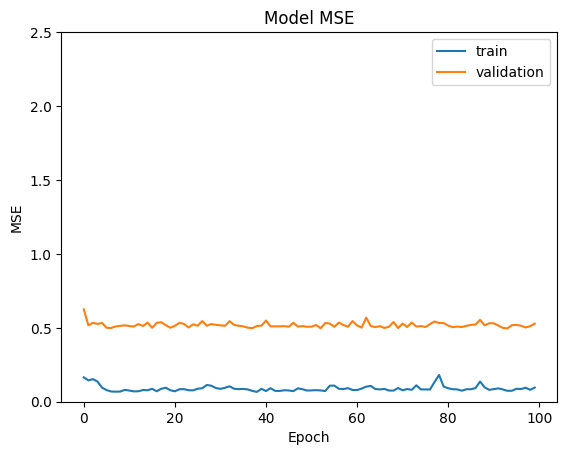

In [125]:
plot_metric(training_history['first_model'])

In [126]:
# plotting function for loss
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 5])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

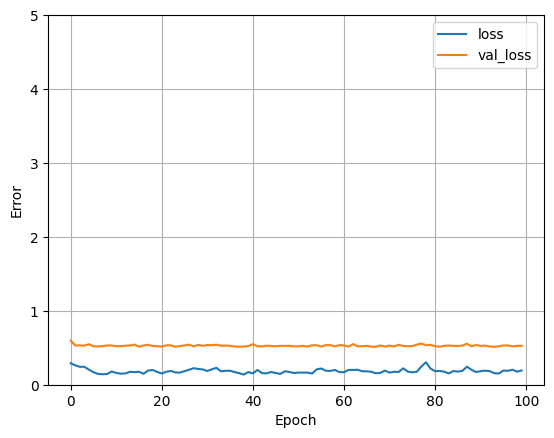

In [127]:
plot_loss(training_history['first_model'])

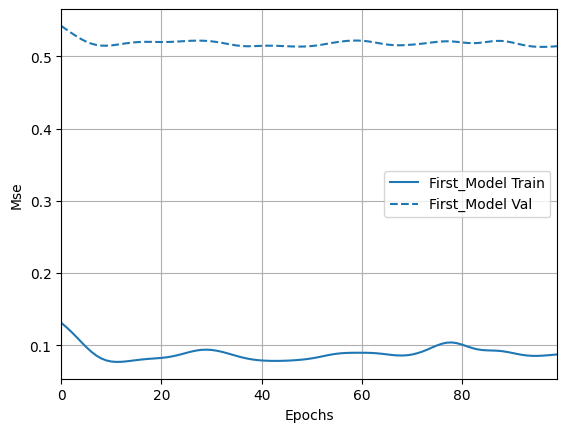

In [128]:
history_plotter = tfdocs.plots.HistoryPlotter(metric = 'mse', smoothing_std=10)
history_plotter.plot(training_history)

In [129]:
training_history

{'first_model': <keras.callbacks.History at 0x31507ea90>}

In [130]:
loss, mse = model.evaluate(X_tf_test, y_tf_test, verbose=0)
print(f'Model MSE: {mse}')

2023-03-29 17:14:12.386515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Model MSE: 0.5201398730278015


2023-03-29 17:14:13.215005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


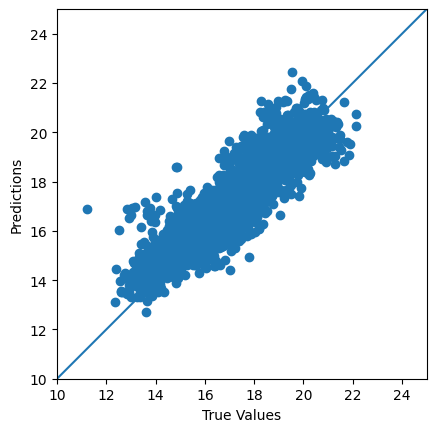

In [131]:
y_pred = model.predict(X_tf_test).flatten()

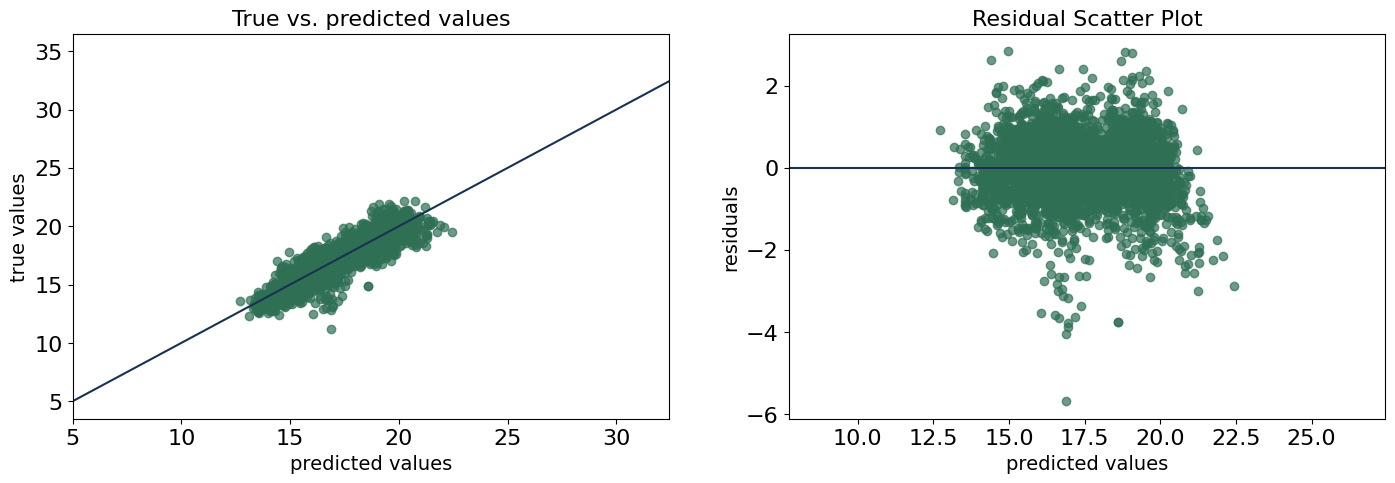

In [132]:
error_analysis(y_tf_test,y_pred)

In [133]:
print('MSE XGBoost Test:\n', mean_squared_error(y_tf_test, y_pred))

# Root Mean Squared Error
print('RMSE XGBoost Test:\n', mean_squared_error(y_tf_test, y_pred, squared = False))

# R^2 Score
print('R^2 XGBoost Test:\n', r2_score(y_tf_test, y_pred))

MSE XGBoost Test:
 0.520139807629714
RMSE XGBoost Test:
 0.7212071877274339
R^2 XGBoost Test:
 0.8211261386975248


## Model tuning

## Second model

In [134]:
#===========#
# Second Model with more nodes
#===========#

with tf.device('/cpu:0'):
    model = tf.keras.Sequential([
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(1)
    ])  


kfold = KFold(n_splits=5, shuffle=True, random_state=RSEED)
cvscores = []

for train, test in kfold.split(X_tf_train,y_tf_train):
#your_history = model_compile_and_fit(your_model, ....)
    with tf.device('/cpu:0'):
        training_history["second_model"] = model_compile_and_fit(model, "second_model")

model.summary()

Epoch 1/100
9/9 [==============================] - 1s 46ms/step - loss: 14.4260 - mse: 217.2873 - val_loss: 7.8261 - val_mse: 80.9114
Epoch 2/100
9/9 [==============================] - 0s 30ms/step - loss: 6.2928 - mse: 56.6190 - val_loss: 4.8309 - val_mse: 40.6028
Epoch 3/100
9/9 [==============================] - 0s 28ms/step - loss: 3.9197 - mse: 29.5675 - val_loss: 2.8044 - val_mse: 19.0194
Epoch 4/100
9/9 [==============================] - 0s 30ms/step - loss: 2.3077 - mse: 13.3373 - val_loss: 1.9846 - val_mse: 11.0458
Epoch 5/100
9/9 [==============================] - 0s 30ms/step - loss: 1.7074 - mse: 7.8148 - val_loss: 1.3920 - val_mse: 5.9786
Epoch 6/100
9/9 [==============================] - 0s 32ms/step - loss: 1.1683 - mse: 3.7026 - val_loss: 1.0262 - val_mse: 2.3969
Epoch 7/100
9/9 [==============================] - 0s 33ms/step - loss: 0.7576 - mse: 1.4958 - val_loss: 0.7541 - val_mse: 1.3491
Epoch 8/100
9/9 [==============================] - 0s 30ms/step - loss: 0.6420 -

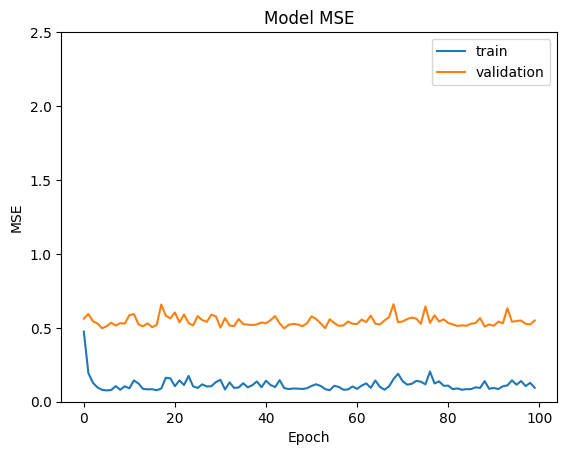

In [135]:
plot_metric(training_history['second_model'])

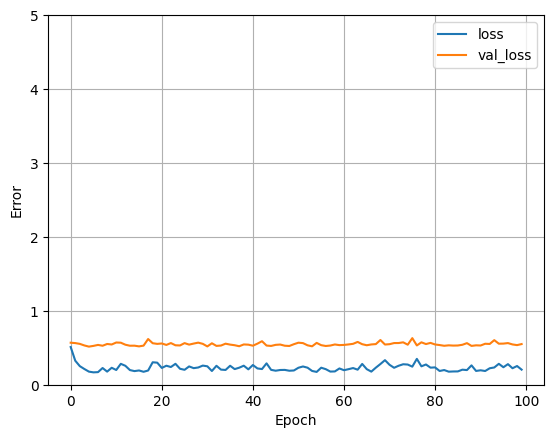

In [136]:
plot_loss(training_history['second_model'])

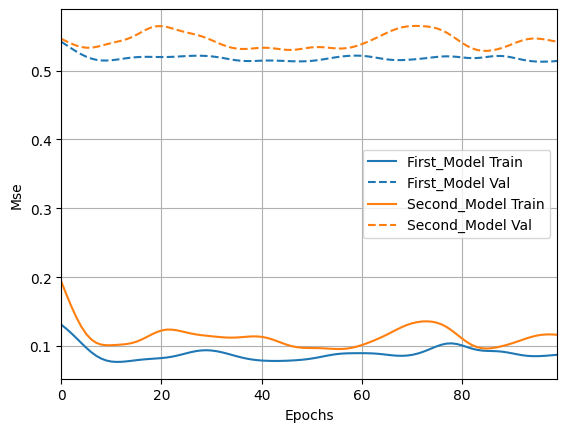

In [137]:
history_plotter = tfdocs.plots.HistoryPlotter(metric = 'mse', smoothing_std=10)
history_plotter.plot(training_history)

In [138]:
training_history

{'first_model': <keras.callbacks.History at 0x31507ea90>,
 'second_model': <keras.callbacks.History at 0x317abd910>}

In [139]:
loss, mse = model.evaluate(X_tf_test, y_tf_test, verbose=2)
print(f'Model MSE: {mse}')

2023-03-29 17:16:34.363555: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


136/136 - 1s - loss: 0.5524 - mse: 0.5515 - 764ms/epoch - 6ms/step
Model MSE: 0.5514734983444214


2023-03-29 17:16:35.138246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


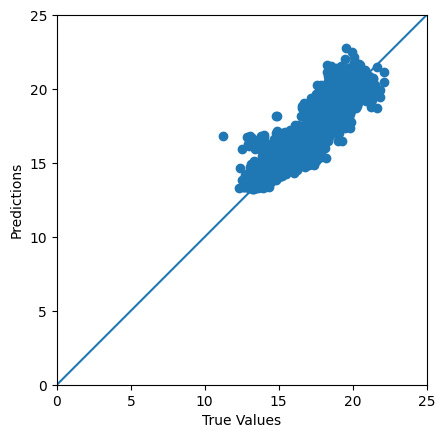

In [140]:
y_pred = model.predict(X_tf_test).flatten()

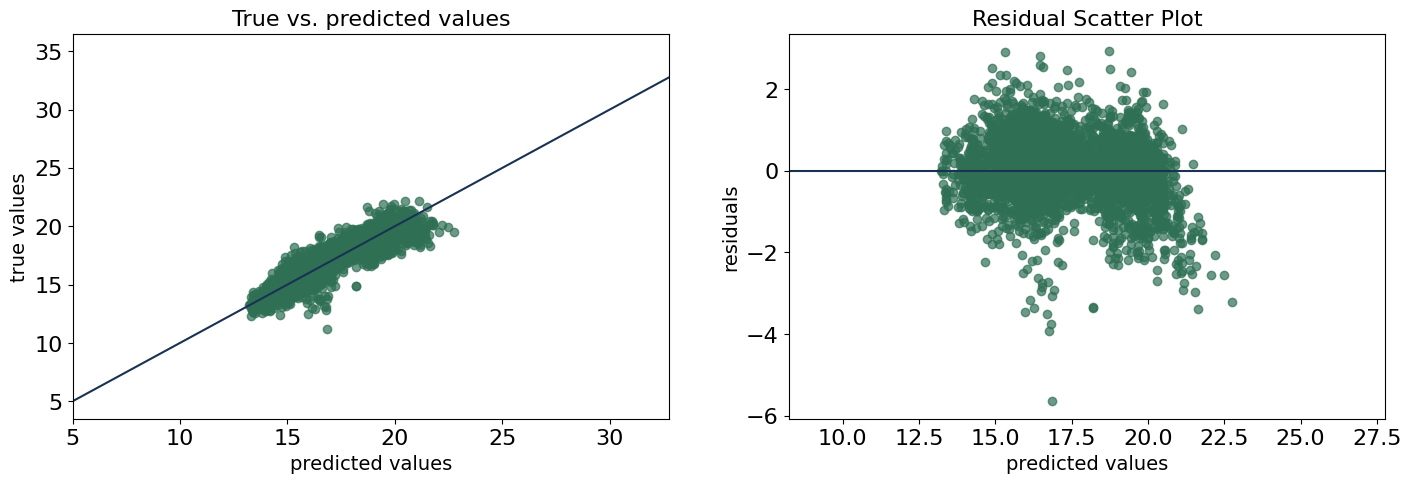

In [141]:
error_analysis(y_tf_test,y_pred)

In [142]:
print('MSE XGBoost Test:\n', mean_squared_error(y_tf_test, y_pred))

# Root Mean Squared Error
print('RMSE XGBoost Test:\n', mean_squared_error(y_tf_test, y_pred, squared = False))

# R^2 Score
print('R^2 XGBoost Test:\n', r2_score(y_tf_test, y_pred))

MSE XGBoost Test:
 0.5514736001129724
RMSE XGBoost Test:
 0.7426126851279693
R^2 XGBoost Test:
 0.8103505811098983


## Third model

In [143]:
#===========#
# Third Model with more layers
#===========#

with tf.device('/cpu:0'):
    model = tf.keras.Sequential([
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(500, activation='relu'),
        # layers.Dense(500, activation='relu'),
        # layers.Dense(500, activation='relu'),
        # layers.Dense(500, activation='relu'),
        # layers.Dense(500, activation='relu'),
        # layers.Dense(500, activation='relu'),
        # layers.Dense(500, activation='relu'),
        # layers.Dense(500, activation='relu'),
        # layers.Dense(500, activation='relu'),
        # layers.Dense(500, activation='relu'),
        # layers.Dense(500, activation='relu'),
        layers.Dense(1)
    ])  

kfold = KFold(n_splits=5, shuffle=True, random_state=RSEED)
cvscores = []

for train, test in kfold.split(X_tf_train,y_tf_train):

#your_history = model_compile_and_fit(your_model, ....)
    with tf.device('/cpu:0'):
        training_history["third_model"] = model_compile_and_fit(model, "third_model")

model.summary()        

Epoch 1/100
9/9 [==============================] - 2s 115ms/step - loss: 11.5649 - mse: 166.2488 - val_loss: 4.0583 - val_mse: 26.4266
Epoch 2/100
9/9 [==============================] - 1s 102ms/step - loss: 4.5188 - mse: 30.0060 - val_loss: 1.7725 - val_mse: 4.8588
Epoch 3/100
9/9 [==============================] - 1s 100ms/step - loss: 2.8433 - mse: 12.0285 - val_loss: 2.6510 - val_mse: 9.9843
Epoch 4/100
9/9 [==============================] - 1s 100ms/step - loss: 2.0725 - mse: 6.5384 - val_loss: 1.5719 - val_mse: 3.9554
Epoch 5/100
9/9 [==============================] - 1s 108ms/step - loss: 1.3162 - mse: 2.7677 - val_loss: 1.0307 - val_mse: 1.6320
Epoch 6/100
9/9 [==============================] - 1s 99ms/step - loss: 1.1068 - mse: 1.9264 - val_loss: 1.3136 - val_mse: 2.8884
Epoch 7/100
9/9 [==============================] - 1s 102ms/step - loss: 1.0038 - mse: 1.5989 - val_loss: 1.5267 - val_mse: 3.9134
Epoch 8/100
9/9 [==============================] - 1s 102ms/step - loss: 1.131

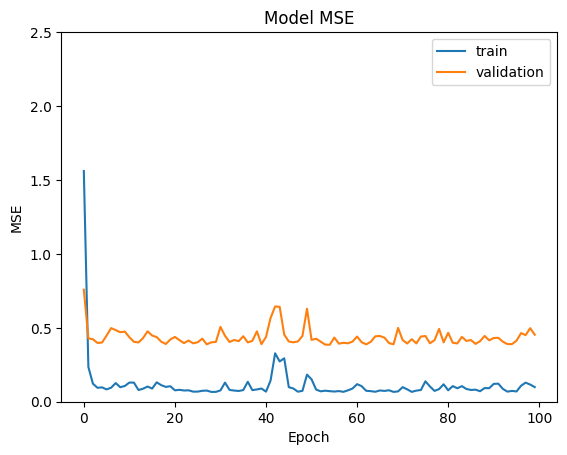

In [144]:
plot_metric(training_history['third_model'])

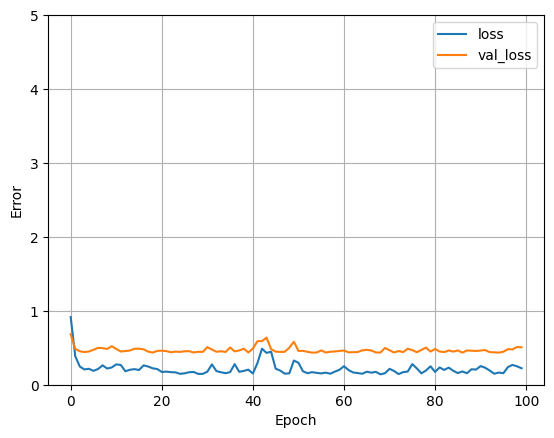

In [145]:
plot_loss(training_history['third_model'])

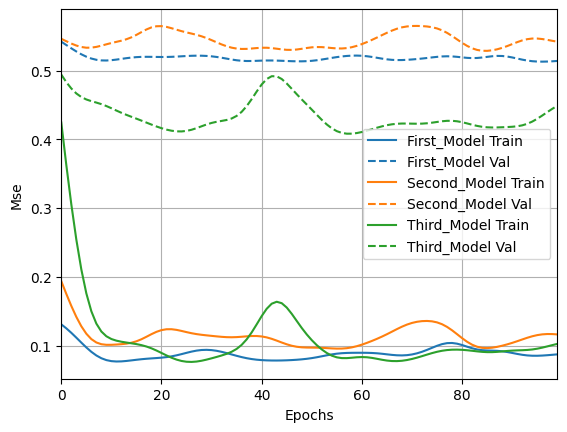

In [146]:
history_plotter = tfdocs.plots.HistoryPlotter(metric = 'mse', smoothing_std=10)
history_plotter.plot(training_history)

In [147]:
training_history

{'first_model': <keras.callbacks.History at 0x31507ea90>,
 'second_model': <keras.callbacks.History at 0x317abd910>,
 'third_model': <keras.callbacks.History at 0x300e09f70>}

In [148]:
loss, mse = model.evaluate(X_tf_test, y_tf_test, verbose=2)
print(f'Model MSE: {mse}')

2023-03-29 17:24:22.207033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


136/136 - 1s - loss: 0.5161 - mse: 0.4565 - 1s/epoch - 8ms/step
Model MSE: 0.4565487205982208


2023-03-29 17:24:23.320463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


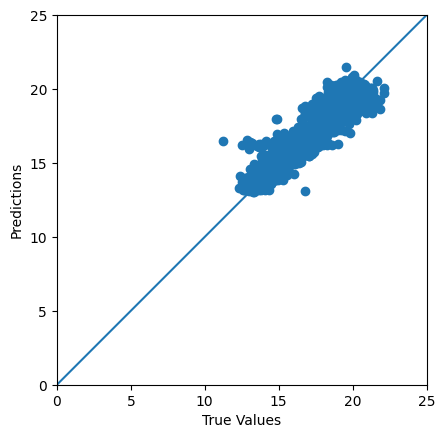

In [149]:
y_pred = model.predict(X_tf_test).flatten()

In [150]:
def error_analysis(y_test, y_pred):
    """Generated true vs. predicted values and residual scatter plot for models
    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of model for y_test
    """
    # calculate residuals
    residuals = y_test - y_pred
    # plot real vs. predicted values
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('')
    ax[0].scatter(y_pred, y_test, color="#2f7055", alpha=0.7)
    ax[0].plot([5, 35], [5, 35], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values", fontsize=14)
    ax[0].set_ylabel("true values",  fontsize=14)
    ax[0].set_xlim((5), (y_pred.max()+10))
    #ax[0].set_ylim((5), (y_test.max()+10))
    ax[0].tick_params(axis='both', which='major', labelsize=16)
    ax[1].scatter(y_pred, residuals, color="#2f7055", alpha=0.7)
    ax[1].plot([-400, 350], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values", fontsize=14)
    ax[1].set_ylabel("residuals", fontsize=14)
    ax[1].set_xlim((y_pred.min()-5), (y_pred.max()+5))
    #ax[1].set_ylim((residuals.min()-5), (residuals.max()+5))
    ax[1].tick_params(axis='both', which='major', labelsize=16);

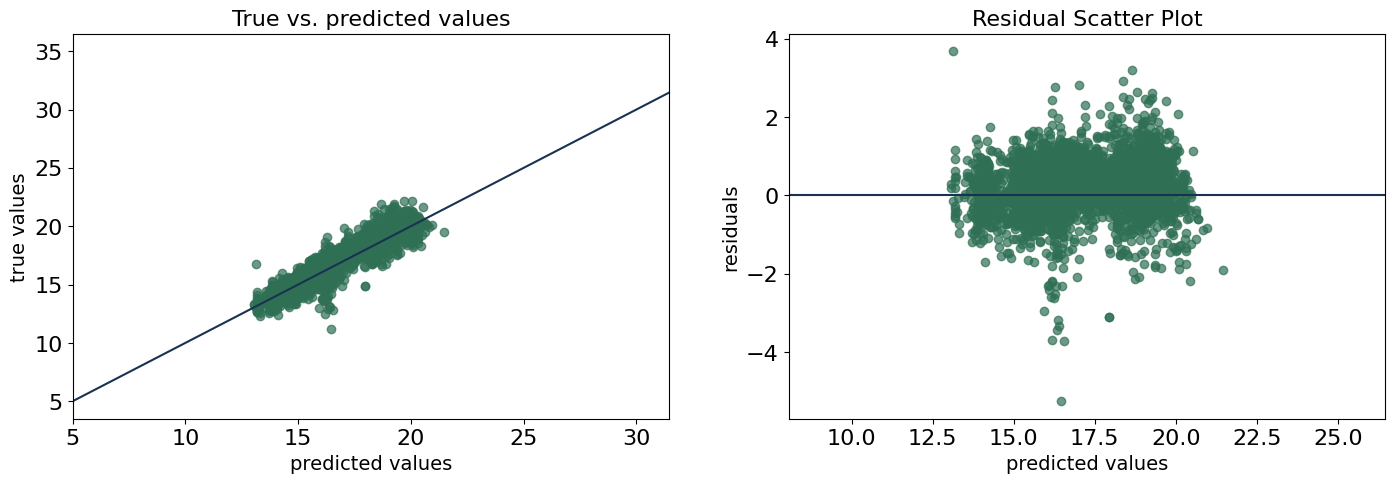

In [151]:
error_analysis(y_tf_test,y_pred)

In [152]:
print('MSE XGBoost Test:\n', mean_squared_error(y_tf_test, y_pred))

# Root Mean Squared Error
print('RMSE XGBoost Test:\n', mean_squared_error(y_tf_test, y_pred, squared = False))

# R^2 Score
print('R^2 XGBoost Test:\n', r2_score(y_tf_test, y_pred))

MSE XGBoost Test:
 0.456548751944274
RMSE XGBoost Test:
 0.6756839142263741
R^2 XGBoost Test:
 0.8429948315141551


## Fourth model

In [153]:
#===========#
# Fourth Model with dropout
#===========#

with tf.device('/cpu:0'):
    model = tf.keras.Sequential([
        layers.Dense(500, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        layers.Dense(500, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        layers.Dense(1)
    ])  

kfold = KFold(n_splits=5, shuffle=True, random_state=RSEED)
cvscores = []

for train, test in kfold.split(X_tf_train,y_tf_train):

#your_history = model_compile_and_fit(your_model, ....)
    with tf.device('/cpu:0'):
        training_history["fourth_model"] = model_compile_and_fit(model, "fourth_model")

model.summary()        

Epoch 1/100
9/9 [==============================] - 1s 47ms/step - loss: 14.4972 - mse: 219.4504 - val_loss: 8.0657 - val_mse: 86.1209
Epoch 2/100
9/9 [==============================] - 0s 36ms/step - loss: 6.4020 - mse: 57.2737 - val_loss: 4.8953 - val_mse: 42.0549
Epoch 3/100
9/9 [==============================] - 0s 34ms/step - loss: 3.9736 - mse: 30.4085 - val_loss: 2.8170 - val_mse: 18.0874
Epoch 4/100
9/9 [==============================] - 0s 35ms/step - loss: 2.7205 - mse: 14.5147 - val_loss: 2.0570 - val_mse: 11.3129
Epoch 5/100
9/9 [==============================] - 0s 34ms/step - loss: 2.2203 - mse: 10.1085 - val_loss: 1.7622 - val_mse: 6.1641
Epoch 6/100
9/9 [==============================] - 0s 33ms/step - loss: 1.7417 - mse: 5.2991 - val_loss: 1.2442 - val_mse: 2.7395
Epoch 7/100
9/9 [==============================] - 0s 35ms/step - loss: 1.2843 - mse: 2.9087 - val_loss: 1.1336 - val_mse: 2.1072
Epoch 8/100
9/9 [==============================] - 0s 34ms/step - loss: 1.2108 

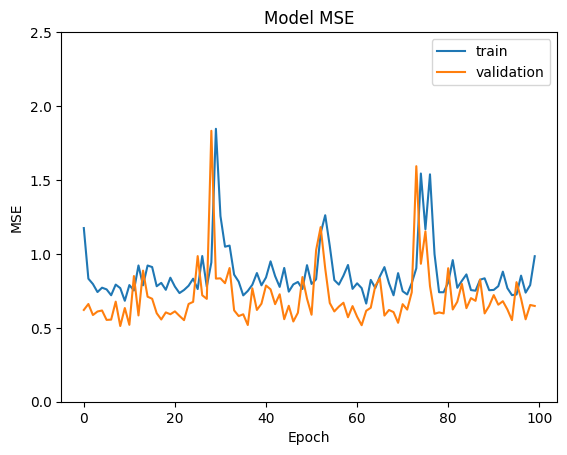

In [154]:
plot_metric(training_history['fourth_model'])

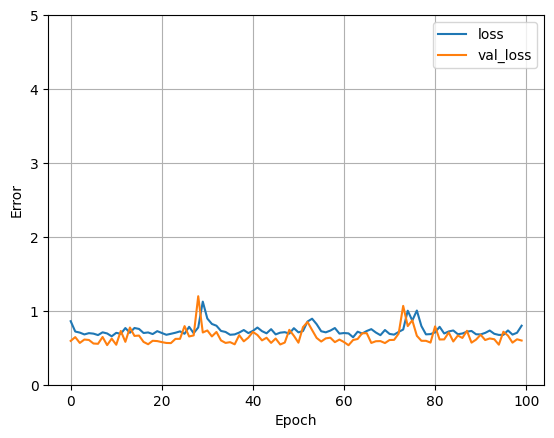

In [155]:
plot_loss(training_history['fourth_model'])

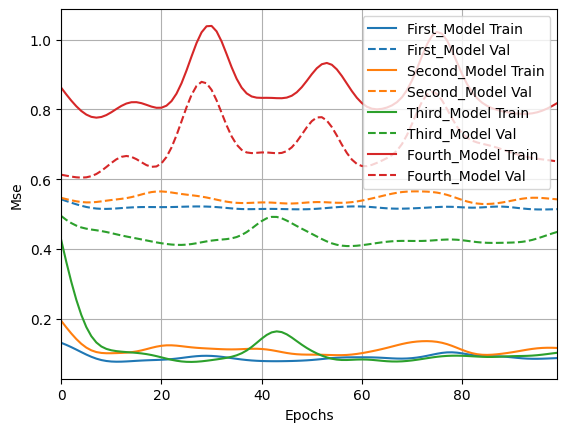

In [156]:
history_plotter = tfdocs.plots.HistoryPlotter(metric = 'mse', smoothing_std=10)
history_plotter.plot(training_history)

In [157]:
training_history

{'first_model': <keras.callbacks.History at 0x31507ea90>,
 'second_model': <keras.callbacks.History at 0x317abd910>,
 'third_model': <keras.callbacks.History at 0x300e09f70>,
 'fourth_model': <keras.callbacks.History at 0x31792f7c0>}

In [158]:
loss, mse = model.evaluate(X_tf_test, y_tf_test, verbose=2)
print(f'Model MSE: {mse}')

2023-03-29 17:26:58.514819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


136/136 - 1s - loss: 0.5967 - mse: 0.6413 - 737ms/epoch - 5ms/step
Model MSE: 0.6412886381149292


2023-03-29 17:26:59.255398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


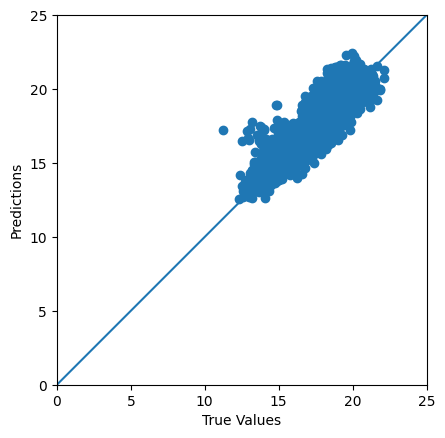

In [159]:
y_pred = model.predict(X_tf_test).flatten()

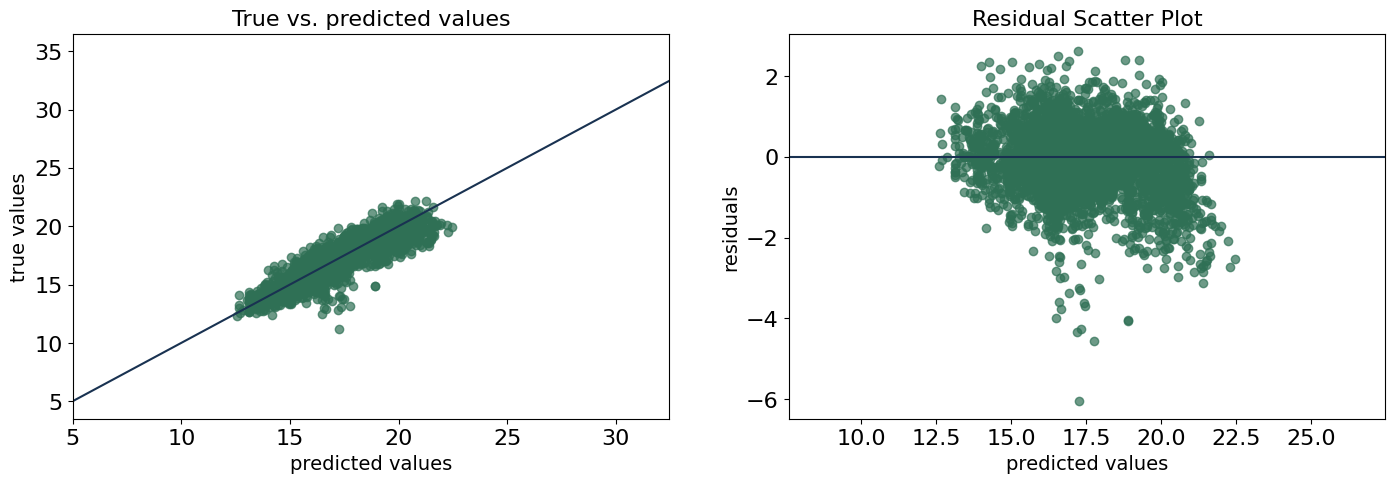

In [160]:
error_analysis(y_tf_test,y_pred)

In [161]:
print('MSE XGBoost Test:\n', mean_squared_error(y_tf_test, y_pred))

# Root Mean Squared Error
print('RMSE XGBoost Test:\n', mean_squared_error(y_tf_test, y_pred, squared = False))

# R^2 Score
print('R^2 XGBoost Test:\n', r2_score(y_tf_test, y_pred))

MSE XGBoost Test:
 0.6412887545469211
RMSE XGBoost Test:
 0.800805066509273
R^2 XGBoost Test:
 0.7794635325867529


In [162]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [163]:
%tensorboard --logdir=./my_logs --port=6005